In [7]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
conn = sqlite3.connect('data/im.db')
df = pd.read_csv('data/bom.movie_gross.csv.gz', index_col=0)
df.head(10)

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010
The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
Iron Man 2,Par.,312400000.0,311500000,2010
Tangled,BV,200800000.0,391000000,2010
Despicable Me,Uni.,251500000.0,291600000,2010


In [2]:

pd.read_sql("""
SELECT * 
  FROM movie_basics;
""", conn).head()






,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [3]:
#Here we can see the average rating of the genders WITH the highest Number of votes.
#The main reason to filter this way is to show people that not always the best rated movie is the one who have more votes
pd.read_sql("""
SELECT movie_basics.genres AS Category,movie_ratings.averagerating AS Rating,movie_ratings.numvotes
  FROM movie_basics
  INNER JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
  WHERE movie_ratings.numvotes >= 600000
  GROUP BY movie_basics.genres
  ORDER BY numvotes DESC
  ;
""", conn)

,Category,Rating,numvotes
0,"Action,Thriller",8.4,1387769
1,"Adventure,Drama,Sci-Fi",8.6,1299334
2,"Drama,Western",8.4,1211405
3,"Biography,Crime,Drama",8.2,1035358
4,"Mystery,Thriller",8.1,1005960
5,"Action,Adventure,Comedy",8.1,948394
6,"Drama,Mystery,Thriller",8.1,761592
7,"Adventure,Family,Fantasy",7.9,719629
8,"Drama,Sci-Fi,Thriller",7.7,710018
9,"Adventure,Drama,Fantasy",8.1,691835


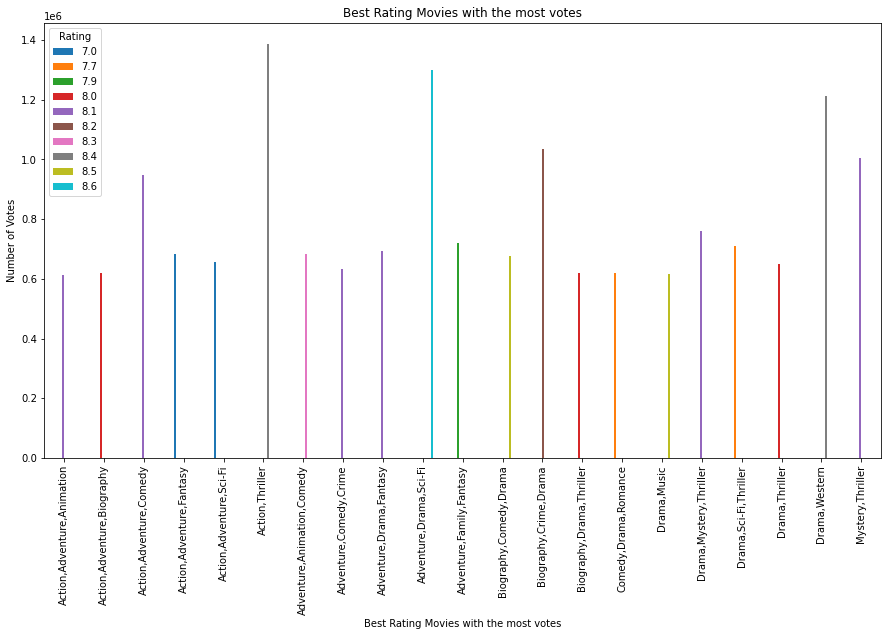

In [32]:
#Graphic
q= """
SELECT movie_basics.genres AS Category,movie_ratings.averagerating AS Rating,movie_ratings.numvotes as NumberVotes
  FROM movie_basics
  INNER JOIN movie_ratings ON movie_basics.movie_id = movie_ratings.movie_id
  WHERE movie_ratings.numvotes >= 600000
  GROUP BY movie_basics.genres
  ORDER BY numvotes DESC
;
"""
df=pd.read_sql(q, conn)
df.pivot(index='Category',columns='Rating',values='NumberVotes').plot(kind='bar',figsize=(15,8))
plt.xlabel('Best Rating Movies with the most votes')
plt.ylabel('Number of Votes')
plt.title('Best Rating Movies with the most votes')
plt.show()
